In [13]:
clear ; close all; clc

In [14]:
%sales figs data

data = load('C:\Users\Jimmy\Google Drive\Career\Job Apps\Insight_\Interview\Case Interview\sales_figs.txt');


In [15]:
data


data =

   1.0e+03 *

    2.0110    0.0010         0         0         0         0         0         0         0         0
    2.0110    0.0020         0         0         0         0         0         0         0         0
    2.0110    0.0030         0         0         0         0         0         0         0         0
    2.0110    0.0040    0.0020         0         0    0.0020         0         0         0         0
    2.0120    0.0050    0.0193         0         0    0.0193         0         0         0         0
    2.0120    0.0060    0.0297         0         0    0.0297         0         0         0         0
    2.0120    0.0070    0.0437         0    0.0030    0.0467         0         0         0         0
    2.0120    0.0080    0.0433    0.0037    0.0250    0.0720    0.0060         0         0         0
    2.0130    0.0090    0.0488    0.0059    0.0350    0.0897    0.0110         0         0         0
    2.0130    0.0100    0.0541    0.0058    0.0330    0.0929    0.02

In [16]:
Quarters = data(:,1); 
t = data(:,2);
t=(0.25:0.25:8.25); % renormalizing t in years 
J= data(:,6);
X= data(:,7);
O= data(:,10);

In [17]:
%Bass model fitting annual sales

%for J

options = optimset('lsqcurvefit');
options.Algorithm = ('levenberg-marquardt');
options.MaxIter = 1e9;
options.MaxFunEvals=1e9;
% options.TolFun=1e-9;
options.TolX=1e-60;
F_J=@(xJ,t) xJ(3)*((xJ(1))^-1)*((xJ(1)+xJ(2))^2)*(1+((xJ(2)/xJ(1)).*exp(-(xJ(1)*t)-(xJ(2)*t)))).^-2.*(exp(-(xJ(1)*t)-(xJ(2)*t)))      

x0_J=[0.03; 0.38; 10000];
[xJ,resnorm,~,exitflag,output] = lsqcurvefit(F_J,x0_J,t,J',[],[],options)



F_J =

  function_handle with value:

    @(xJ,t)xJ(3)*((xJ(1))^-1)*((xJ(1)+xJ(2))^2)*(1+((xJ(2)/xJ(1)).*exp(-(xJ(1)*t)-(xJ(2)*t)))).^-2.*(exp(-(xJ(1)*t)-(xJ(2)*t)))


Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the value of the function tolerance.


xJ =

   1.0e+03 *

    0.0000
    0.0006
    4.8467


resnorm =

   9.8309e+03


exitflag =

     3


output = 

  struct with fields:

       iterations: 18
        funcCount: 87
         stepsize: 0.6633
     cgiterations: []
    firstorderopt: 112.4791
        algorithm: 'levenberg-marquardt'
          message: '...'




Current plot released



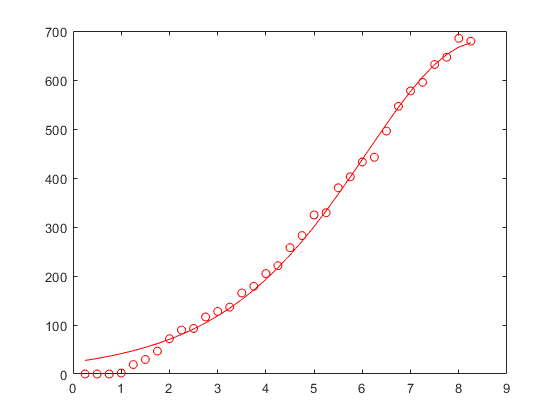

In [18]:
plot(t,J,'ro')
hold on
plot(t,F_J(xJ,t),'r')
hold


F_X =

  function_handle with value:

    @(xX,t)xX(3)*((xX(1))^-1)*((xX(1)+xX(2))^2)*(1+((xX(2)/xX(1)).*exp(-(xX(1)*t)-(xX(2)*t)))).^-2.*(exp(-(xX(1)*t)-(xX(2)*t)))


Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the value of the function tolerance.


xX =

   1.0e+03 *

    0.0000
    0.0005
    9.8103


resnorm =

   8.0151e+04


exitflag =

     3


output = 

  struct with fields:

       iterations: 12
        funcCount: 65
         stepsize: 4.8085e-04
     cgiterations: []
    firstorderopt: 2.4700e+03
        algorithm: 'levenberg-marquardt'
          message: '...'




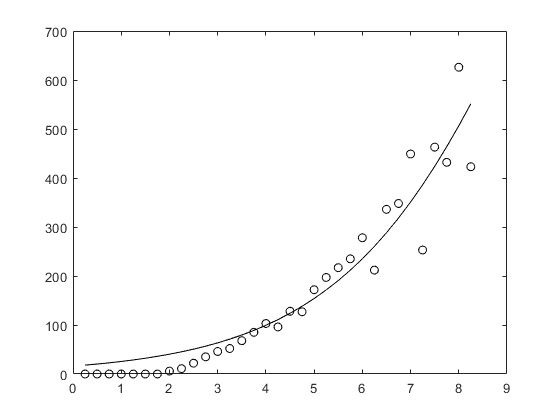

In [19]:
%for X

F_X=@(xX,t) xX(3)*((xX(1))^-1)*((xX(1)+xX(2))^2)*(1+((xX(2)/xX(1)).*exp(-(xX(1)*t)-(xX(2)*t)))).^-2.*(exp(-(xX(1)*t)-(xX(2)*t)))      

x0_X=[0.03; 0.38; 100000];
[xX,resnorm,~,exitflag,output] = lsqcurvefit(F_X,x0_X,t,X',[],[],options)


plot(t,X,'ko')
hold on
plot(t,F_X(xX,t),'k')



F_O =

  function_handle with value:

    @(xO,t)xO(3)*((xO(1))^-1)*((xO(1)+xO(2))^2)*(1+((xO(2)/xO(1)).*exp(-(xO(1)*t)-(xO(2)*t)))).^-2.*(exp(-(xO(1)*t)-(xO(2)*t)))


Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the value of the function tolerance.


xO =

   1.0e+03 *

    0.0000
    0.0012
    3.3995


resnorm =

  491.4671


exitflag =

     3


output = 

  struct with fields:

       iterations: 60
        funcCount: 280
         stepsize: 4.7819e-04
     cgiterations: []
    firstorderopt: 8.6288e+03
        algorithm: 'levenberg-marquardt'
          message: '...'




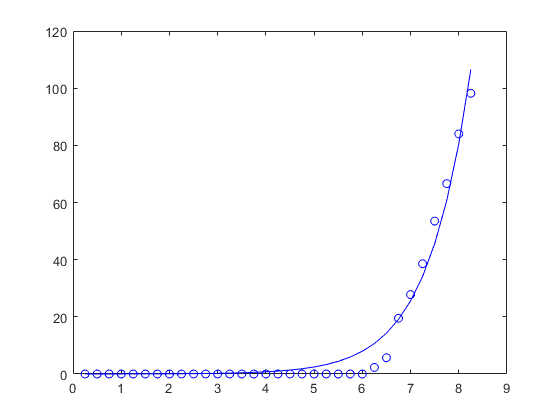

In [20]:
%for O

F_O=@(xO,t) xO(3)*((xO(1))^-1)*((xO(1)+xO(2))^2)*(1+((xO(2)/xO(1)).*exp(-(xO(1)*t)-(xO(2)*t)))).^-2.*(exp(-(xO(1)*t)-(xO(2)*t)))      



x0_O=[0.03; 0.38; 100000];
[xO,resnorm,~,exitflag,output] = lsqcurvefit(F_O,x0_O,t,O',[],[],options)


plot(t,O,'bo')
hold on
plot(t,F_O(xO,t),'b')

In [21]:
%plotting the Bass function sym, in extended t

t=(0.25:0.25:18.25); % renormalizing t in years 

F_J=xJ(3)*((xJ(1))^-1)*((xJ(1)+xJ(2))^2)*(1+((xJ(2)/xJ(1)).*exp(-(xJ(1)*t)-(xJ(2)*t)))).^-2.*(exp(-(xJ(1)*t)-(xJ(2)*t)));      

F_X=xX(3)*((xX(1))^-1)*((xX(1)+xX(2))^2)*(1+((xX(2)/xX(1)).*exp(-(xX(1)*t)-(xX(2)*t)))).^-2.*(exp(-(xX(1)*t)-(xX(2)*t)));  

F_O=xO(3)*((xO(1))^-1)*((xO(1)+xO(2))^2)*(1+((xO(2)/xO(1)).*exp(-(xO(1)*t)-(xO(2)*t)))).^-2.*(exp(-(xO(1)*t)-(xO(2)*t)));      


Current plot held



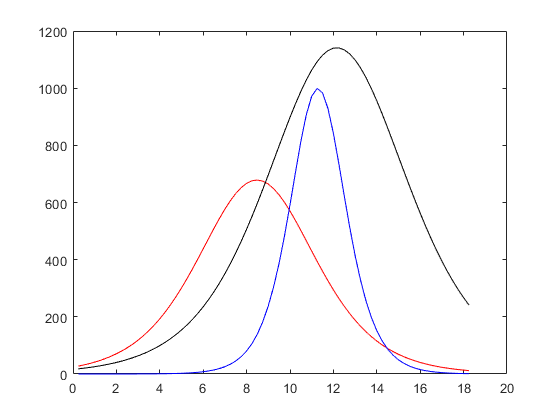

In [23]:
% G=(-x(1)-x(2))./(x(2)+(x(1).*exp(-(x(1)*t)-(x(2)*t))));

plot(t,F_J,'r')
hold
plot(t,F_X,'k')
plot(t,F_O,'b')